**Mentions as a measure of influence in the #SusanRice story**

**Code by Elise Hansen and Alex Seigman**

**Premise:** In our computational journalism class with Mark Hansen, we looked at the origin and spread of the #SusanRice hashtag in order to understand how stories start outside the mainstream, then permute and spread until they reach mainstream news outlets. We used tweets and metadata gathered from API calls to examine different elements of the trend. 

This was a classwide project, so the angle my classmate, Alex Seigman, and I took was to look at “mentions” in a tweet as a measure of influence, to see who might be relevant to shaping the conversation. 

We looked at the people with the top 4 volume of mentions. Their volume--and the timing of the volume variations--demonstrates how different influencers appeared on the scene at different times and gained enough volume to become a part of the conversation.

We also looked at the top URLs shared in tweets as one way to gauge the nature of the conversation and see when certain outlets rose to prominence. 

**Note:** This project is a work in progress, so we do not yet have an accompanying article or interviews. However, the computational work demonstrates some of the tasks that have become fairly routine at this point, and I have attempted to add commentary in places where it may be useful.

In [3]:
from os import listdir
from json import loads
import pandas as pd
from pandas import read_csv

In [4]:
#"mentions" csv

df = pd.read_csv("fake-news-tweets-json/mentions.csv")
df.head()

,id,created_at,screen_name,mention
0,848395569160704000,Sun Apr 02 04:44:00 +0000 2017,tracieeeeee,catiecate7
1,848395569160704000,Sun Apr 02 04:44:00 +0000 2017,tracieeeeee,SheriffClarke
2,848662888755736578,Sun Apr 02 22:26:14 +0000 2017,latmadays,Cernovich
3,848664135923621893,Sun Apr 02 22:31:12 +0000 2017,anthonycasey2,latmadays
4,848664135923621893,Sun Apr 02 22:31:12 +0000 2017,anthonycasey2,Cernovich


In [5]:
#our "influencers"

df["mention"].value_counts()

Cernovich          51175
RealJamesWoods     17881
realDonaldTrump    16595
CNN                16001
dbongino           11876
DJTJohnMiller      11422
StockMonsterUSA    10977
JackPosobiec       10716
Pamela_Moore13     10360
PrisonPlanet       10273
bfraser747         10157
ABC                 9529
POTUS               9525
DonaldJTrumpJr      9125
AmbassadorRice      9113
DBloom451           8140
carrieksada         8037
Rockprincess818     7369
JessieJaneDuff      7247
RealVinnieJames     6582
Stevenwhirsch99     6236
WeSupport45         6185
POTUS44             6114
LeahR77             6097
nia4_trump          6007
peddoc63            5699
nytimes             5541
asamjulian          5408
JoshNoneYaBiz       5398
FoxNews             5136
                   ...  
WISH_TV                1
DailymotionUSA         1
BethlehamStar          1
MAGAmatt84             1
drmom47                1
ronnieressler          1
AplusNDY               1
Poppabuzzy             1
walidshoebat           1


In [6]:
#find the total number of mentions, as well as the number of unique mentions

df["mention"].describe()

count        933184
unique        21536
top       Cernovich
freq          51175
Name: mention, dtype: object

In [7]:
#timeline: when do people start getting mentioned

from pandas import to_datetime, TimeGrouper, set_option
set_option("display.max_rows",100)
set_option("display.max_colwidth",140)

In [8]:
df["stamp"] = to_datetime(df["created_at"],format='%a %b %d %H:%M:%S +0000 %Y')

df.set_index("stamp",inplace=True)
df.head()

,id,created_at,screen_name,mention
stamp,,,,
2017-04-02 04:44:00,848395569160704000,Sun Apr 02 04:44:00 +0000 2017,tracieeeeee,catiecate7
2017-04-02 04:44:00,848395569160704000,Sun Apr 02 04:44:00 +0000 2017,tracieeeeee,SheriffClarke
2017-04-02 22:26:14,848662888755736578,Sun Apr 02 22:26:14 +0000 2017,latmadays,Cernovich
2017-04-02 22:31:12,848664135923621893,Sun Apr 02 22:31:12 +0000 2017,anthonycasey2,latmadays
2017-04-02 22:31:12,848664135923621893,Sun Apr 02 22:31:12 +0000 2017,anthonycasey2,Cernovich


In [9]:
#let's look at Cernovich

df_Cernovich = df[df["mention"]=="Cernovich"]
df_Cernovich.head()

,id,created_at,screen_name,mention
stamp,,,,
2017-04-02 22:26:14,848662888755736578,Sun Apr 02 22:26:14 +0000 2017,latmadays,Cernovich
2017-04-02 22:31:12,848664135923621893,Sun Apr 02 22:31:12 +0000 2017,anthonycasey2,Cernovich
2017-04-02 22:46:50,848668072684773377,Sun Apr 02 22:46:50 +0000 2017,TruthCape,Cernovich
2017-04-02 22:47:59,848668362758660096,Sun Apr 02 22:47:59 +0000 2017,Bandini199,Cernovich
2017-04-02 22:54:21,848669964362010625,Sun Apr 02 22:54:21 +0000 2017,debgagahiggan,Cernovich


In [10]:
Cv_counts = df_Cernovich.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
Cv_counts.columns = Cv_counts.columns.droplevel()

Cv_counts.head()

,counts
stamp,
2017-04-02 22:00:00,1
2017-04-02 22:30:00,4
2017-04-02 23:00:00,5
2017-04-02 23:30:00,11
2017-04-03 00:00:00,22


In [11]:
Cv_counts.max()

counts    2249
dtype: int64

In [12]:
#so it looks like Cernovich peaks at 'counts == 2249' at 2017-04-09 22:00:00 

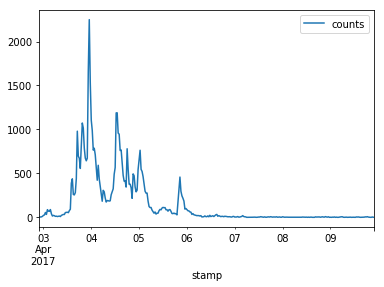

In [116]:
import matplotlib
%matplotlib inline

Cv_counts.plot(kind="line")

In [14]:
#How does Cernovich's rise and fall compare to all tweets?

df_tweets = pd.read_csv("fake-news-tweets-json/tweets.csv")
df_tweets.head()

,id,text,created_at,retweeted,in_reply_to_screen_name,in_reply_to_status_id,source,retweet_count,screen_name,followers_count,friends_count
0,848370744706740224,#JackieSpeier We're positive #DevinNunes was contacted by a #Whistleblower and that #AdamSchiff tells lies on TV like #SusanRice,Sun Apr 02 03:05:22 +0000 2017,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",72,kgarrison,7153,5830
1,848395569160704000,"@catiecate7 @SheriffClarke Oh I believe we will just like with #CrookedHillary, #ValerieJarret, #SusanRice #NancyPelosi, and many more",Sun Apr 02 04:44:00 +0000 2017,False,catiecate7,8.483947e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",34,tracieeeeee,63837,59993
2,848662888755736578,"@Cernovich If so, 2 times the #fallgirl. #SusanRice",Sun Apr 02 22:26:14 +0000 2017,False,Cernovich,8.486621e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",58,latmadays,1968,2664
3,848664135923621893,"RT @latmadays: @Cernovich If so, 2 times the #fallgirl. #SusanRice",Sun Apr 02 22:31:12 +0000 2017,False,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",58,anthonycasey2,2562,3026
4,848665319539261442,More like it: someone has named a SPECIFIC name. #SusanRice https://t.co/REZGF10NAC,Sun Apr 02 22:35:54 +0000 2017,False,NaN,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",82,PlaynCharacter,1121,1087


In [15]:
from pandas import to_datetime, TimeGrouper, set_option

In [16]:
df_tweets["stamp"] = to_datetime(df_tweets["created_at"],format='%a %b %d %H:%M:%S +0000 %Y')

df_tweets.set_index("stamp",inplace=True)
df_tweets.head()

,id,text,created_at,retweeted,in_reply_to_screen_name,in_reply_to_status_id,source,retweet_count,screen_name,followers_count,friends_count
stamp,,,,,,,,,,,
2017-04-02 03:05:22,848370744706740224,#JackieSpeier We're positive #DevinNunes was contacted by a #Whistleblower and that #AdamSchiff tells lies on TV like #SusanRice,Sun Apr 02 03:05:22 +0000 2017,False,NaN,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",72,kgarrison,7153,5830
2017-04-02 04:44:00,848395569160704000,"@catiecate7 @SheriffClarke Oh I believe we will just like with #CrookedHillary, #ValerieJarret, #SusanRice #NancyPelosi, and many more",Sun Apr 02 04:44:00 +0000 2017,False,catiecate7,8.483947e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",34,tracieeeeee,63837,59993
2017-04-02 22:26:14,848662888755736578,"@Cernovich If so, 2 times the #fallgirl. #SusanRice",Sun Apr 02 22:26:14 +0000 2017,False,Cernovich,8.486621e+17,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",58,latmadays,1968,2664
2017-04-02 22:31:12,848664135923621893,"RT @latmadays: @Cernovich If so, 2 times the #fallgirl. #SusanRice",Sun Apr 02 22:31:12 +0000 2017,False,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",58,anthonycasey2,2562,3026
2017-04-02 22:35:54,848665319539261442,More like it: someone has named a SPECIFIC name. #SusanRice https://t.co/REZGF10NAC,Sun Apr 02 22:35:54 +0000 2017,False,NaN,NaN,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",82,PlaynCharacter,1121,1087


In [17]:
tweet_counts = df_tweets.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
tweet_counts.columns = tweet_counts.columns.droplevel()


tweet_counts.head()

,counts
stamp,
2017-04-02 03:00:00,1
2017-04-02 03:30:00,0
2017-04-02 04:00:00,0
2017-04-02 04:30:00,1
2017-04-02 05:00:00,0


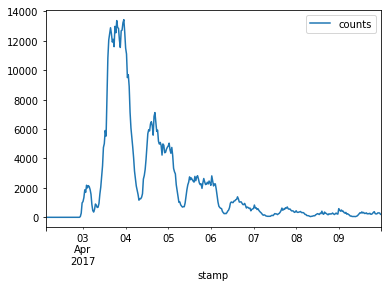

In [18]:
tweet_counts.plot(kind="line")

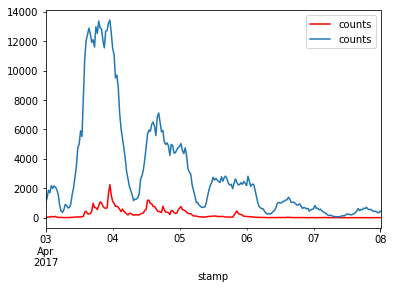

In [19]:
#plot them together

ax = Cv_counts.plot(kind="line", color = "red", xlim=("04-03-2017 00:00:00", "04-08-2017 00:00:00"))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-03-2017 00:00:00", "04-08-2017 00:00:00"))

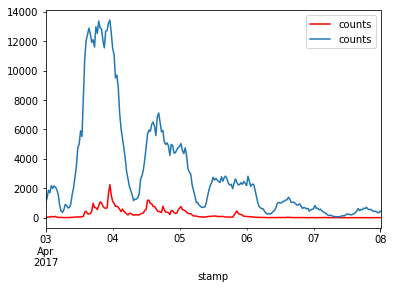

In [20]:
#plot them together and zoom in a bit

ax = Cv_counts.plot(kind="line", color = "red", xlim=("04-03-2017 00:00:00", "04-08-2017 00:00:00"))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-03-2017 00:00:00", "04-08-2017 00:00:00"))

In [21]:
#ok, let's get some more people in here

In [22]:
df_Woods = df[df["mention"]=="RealJamesWoods"]
df_Woods.head()

,id,created_at,screen_name,mention
stamp,,,,
2017-04-02 23:45:52,848682928532066304,Sun Apr 02 23:45:52 +0000 2017,suziepn,RealJamesWoods
2017-04-03 00:05:59,848687990448717824,Mon Apr 03 00:05:59 +0000 2017,TheOldOuthouse,RealJamesWoods
2017-04-03 00:24:33,848692663260000256,Mon Apr 03 00:24:33 +0000 2017,francesme,RealJamesWoods
2017-04-03 00:24:51,848692736853233664,Mon Apr 03 00:24:51 +0000 2017,francesme,RealJamesWoods
2017-04-03 00:48:46,848698757558546434,Mon Apr 03 00:48:46 +0000 2017,mechanixtn,RealJamesWoods


In [23]:
JW_counts = df_Woods.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
JW_counts.columns = JW_counts.columns.droplevel()


JW_counts.head()

,counts
stamp,
2017-04-02 23:30:00,1
2017-04-03 00:00:00,3
2017-04-03 00:30:00,5
2017-04-03 01:00:00,2
2017-04-03 01:30:00,2


In [24]:
df_Trump = df[df["mention"]=="realDonaldTrump"]
df_Trump.head()

,id,created_at,screen_name,mention
stamp,,,,
2017-04-02 23:17:49,848675870671749120,Sun Apr 02 23:17:49 +0000 2017,lestilton,realDonaldTrump
2017-04-02 23:32:58,848679683122016256,Sun Apr 02 23:32:58 +0000 2017,LottaFaChina,realDonaldTrump
2017-04-02 23:34:51,848680154624913410,Sun Apr 02 23:34:51 +0000 2017,Egyptianstyle11,realDonaldTrump
2017-04-02 23:35:12,848680243527389184,Sun Apr 02 23:35:12 +0000 2017,SpyvPie,realDonaldTrump
2017-04-02 23:45:55,848682942381641730,Sun Apr 02 23:45:55 +0000 2017,pixiedust5135,realDonaldTrump


In [25]:
DT_counts = df_Trump.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
DT_counts.columns = DT_counts.columns.droplevel()


DT_counts.head()

,counts
stamp,
2017-04-02 23:00:00,1
2017-04-02 23:30:00,7
2017-04-03 00:00:00,8
2017-04-03 00:30:00,13
2017-04-03 01:00:00,11


In [26]:
df_CNN = df[df["mention"]=="CNN"]
df_CNN.head()

,id,created_at,screen_name,mention
stamp,,,,
2017-04-02 22:53:46,848669815485104128,Sun Apr 02 22:53:46 +0000 2017,JoosieLeaks,CNN
2017-04-02 22:54:35,848670023581396992,Sun Apr 02 22:54:35 +0000 2017,bobo_anime,CNN
2017-04-02 22:54:39,848670040757075969,Sun Apr 02 22:54:39 +0000 2017,Trues55,CNN
2017-04-02 22:55:12,848670178917441540,Sun Apr 02 22:55:12 +0000 2017,anthonycasey2,CNN
2017-04-02 22:56:31,848670509243940865,Sun Apr 02 22:56:31 +0000 2017,GodzillaReign,CNN


In [27]:
CNN_counts = df_CNN.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
CNN_counts.columns = CNN_counts.columns.droplevel()


CNN_counts.head()

,counts
stamp,
2017-04-02 22:30:00,6
2017-04-02 23:00:00,20
2017-04-02 23:30:00,15
2017-04-03 00:00:00,9
2017-04-03 00:30:00,26


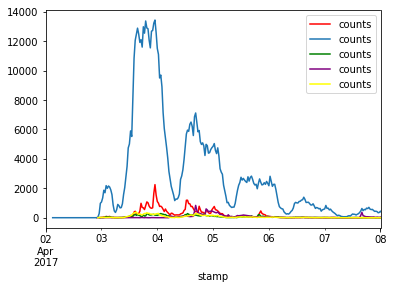

In [28]:
ax = Cv_counts.plot(kind="line", color = "red", xlim=("04-02-2017 00:00:00", "04-08-2017 00:00:00"))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-08-2017 00:00:00"))
DT_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-08-2017 00:00:00"), color="green")
JW_counts.plot(ax=ax, kind="line",xlim=("04-02-2017 00:00:00", "04-08-2017 00:00:00"), color="purple")
CNN_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-08-2017 00:00:00"), color="yellow")

#ta-da!

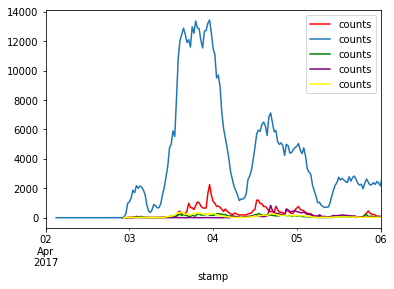

In [29]:
#zooming in

ax = Cv_counts.plot(kind="line", color = "red", xlim=("04-02-2017 00:00:00", "04-06-2017 00:00:00"))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-06-2017 00:00:00"))
DT_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-06-2017 00:00:00"), color="green")
JW_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-06-2017 00:00:00"), color="purple")
CNN_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 00:00:00", "04-06-2017 00:00:00"), color="yellow")

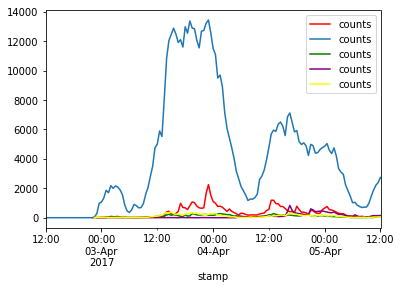

In [30]:
#zooming in again

ax = Cv_counts.plot(kind="line", color = "red", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"))
DT_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), color="green")
JW_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), color="purple")
CNN_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), color="yellow")

In [31]:
#constrain y axis, just to get a better look at our mentions

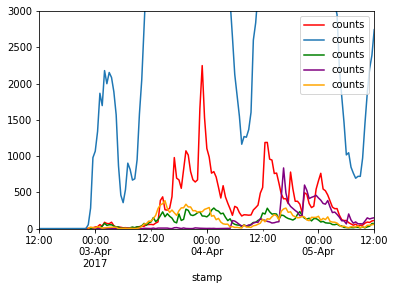

In [32]:
ax = Cv_counts.plot(kind="line", color = "red", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), ylim=(0,3000))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), ylim=(0,3000))
DT_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), ylim=(0,3000), color="green")
JW_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), ylim=(0,3000), color="purple")
CNN_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-05-2017 12:00:00"), ylim=(0,3000), color="orange")

**A few notes**

*Donald Trump mentions (green) stay relatively low and relatively level. They appear in the first major spike. (hypothesis: this is right after his Pulitzer tweet?)

*Cernovich mentions (red) roughly correlate to the overall tweet volume.

*James Woods mentions (purple) come later: they start in day 2 of the story, then rise as high as Cernovich during that day's tweet peak. 

*CNN mentions (yellow/orange) has a really similar trajectory to Donald Trump. 


Some helpful links

Cernovich breaks story (April 2): https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16
Cernovich's medium post about being hijacked by Bloomberg (April 3): https://medium.com/@Cernovich/timeline-of-susan-rice-spy-story-and-the-fake-news-medias-reaction-b52f2cfab67c

*So how do we detrmine when and where the story changed? Where did it diverge from the 'master branch'? 

We'll look at the prevalence of different URLs and their text.
We'll also take a look at some of the tweets that contain our big-name mentions

In [33]:
#Cernovich breaks story (April 2): https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16
#^this is the 'master branch'

In [34]:
#when did various URLs become prevalent?

In [35]:
df_urls = pd.read_csv("fake-news-tweets-json/urls.csv")
df_urls.head()

,id,created_at,screen_name,url
0,848665319539261442,Sun Apr 02 22:35:54 +0000 2017,PlaynCharacter,https://twitter.com/Cernovich/status/848662120912658434
1,848666236913422337,Sun Apr 02 22:39:32 +0000 2017,Xavier_Trumpin,https://twitter.com/Cernovich/status/848662120912658434
2,848668413366943744,Sun Apr 02 22:48:11 +0000 2017,satirist_indian,https://twitter.com/Cernovich/status/848662120912658434
3,848668686802194432,Sun Apr 02 22:49:17 +0000 2017,TwiterIsFascist,http://circa.com/politics/barack-obama-changed-how-nsa-intercepts-of-americans-like-donald-trump-could-be-shared
4,848668720641789952,Sun Apr 02 22:49:25 +0000 2017,Damn_Penguin,http://circa.com/politics/barack-obama-changed-how-nsa-intercepts-of-americans-like-donald-trump-could-be-shared


In [36]:
#This gives us our top URLs by volume.

df_urls["url"].value_counts()

https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16                                                                                                                                                                          7802
https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel                                                                                                                                                                                6690
http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/                                                                                                                                                                           4264
https://twitter.com/SargentDaikon/status/848955688214827010                                                                    

In [37]:
df_urls["stamp"] = to_datetime(df_urls["created_at"],format='%a %b %d %H:%M:%S +0000 %Y')

df_urls.set_index("stamp",inplace=True)

df_urls.head()

,id,created_at,screen_name,url
stamp,,,,
2017-04-02 22:35:54,848665319539261442,Sun Apr 02 22:35:54 +0000 2017,PlaynCharacter,https://twitter.com/Cernovich/status/848662120912658434
2017-04-02 22:39:32,848666236913422337,Sun Apr 02 22:39:32 +0000 2017,Xavier_Trumpin,https://twitter.com/Cernovich/status/848662120912658434
2017-04-02 22:48:11,848668413366943744,Sun Apr 02 22:48:11 +0000 2017,satirist_indian,https://twitter.com/Cernovich/status/848662120912658434
2017-04-02 22:49:17,848668686802194432,Sun Apr 02 22:49:17 +0000 2017,TwiterIsFascist,http://circa.com/politics/barack-obama-changed-how-nsa-intercepts-of-americans-like-donald-trump-could-be-shared
2017-04-02 22:49:25,848668720641789952,Sun Apr 02 22:49:25 +0000 2017,Damn_Penguin,http://circa.com/politics/barack-obama-changed-how-nsa-intercepts-of-americans-like-donald-trump-could-be-shared


In [38]:
#Cernovich's medium post

df_Cernovich_url = df_urls[df_urls["url"]=="https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16"]
df_Cernovich_url.head()

,id,created_at,screen_name,url
stamp,,,,
2017-04-03 01:07:43,848703524422680576,Mon Apr 03 01:07:43 +0000 2017,No1islistening0,https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16
2017-04-03 01:14:49,848705314119708672,Mon Apr 03 01:14:49 +0000 2017,0Libertyordeath,https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16
2017-04-03 01:16:01,848705614930993152,Mon Apr 03 01:16:01 +0000 2017,DigitalForests,https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16
2017-04-03 01:19:42,848706542451003392,Mon Apr 03 01:19:42 +0000 2017,gal_deplorable,https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16
2017-04-03 01:23:12,848707422361440256,Mon Apr 03 01:23:12 +0000 2017,jy_liberty,https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16


In [40]:
Cv_url_counts = df_Cernovich_url.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
Cv_url_counts.columns = Cv_url_counts.columns.droplevel()


Cv_url_counts.head()

,counts
stamp,
2017-04-03 01:00:00,6
2017-04-03 01:30:00,9
2017-04-03 02:00:00,25
2017-04-03 02:30:00,43
2017-04-03 03:00:00,29


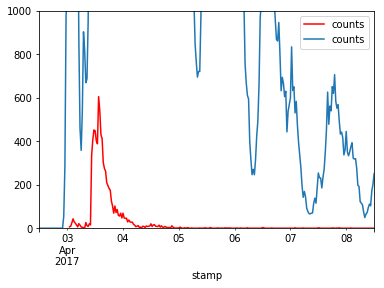

In [41]:
%matplotlib inline
ax = Cv_url_counts.plot(kind="line", color = "red", xlim=("04-02-2017 12:00:00", "04-08-2017 12:00:00"), ylim=(0,1000))
tweet_counts.plot(ax=ax, kind="line", xlim=("04-02-2017 12:00:00", "04-08-2017 12:00:00"), ylim=(0,1000))

In [42]:
#Bloomberg URL

df_Bb_url = df_urls[df_urls["url"]=="https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel"]
df_Bb_url.head()

,id,created_at,screen_name,url
stamp,,,,
2017-04-03 14:21:05,848903183267012608,Mon Apr 03 14:21:05 +0000 2017,Uictoria33,https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel
2017-04-03 14:21:12,848903212228804608,Mon Apr 03 14:21:12 +0000 2017,dekdarion,https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel
2017-04-03 14:22:31,848903542840668160,Mon Apr 03 14:22:31 +0000 2017,brianoflondon,https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel
2017-04-03 14:24:34,848904060270936064,Mon Apr 03 14:24:34 +0000 2017,CatholicSon,https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel
2017-04-03 14:25:07,848904200243224576,Mon Apr 03 14:25:07 +0000 2017,Nancy52778680,https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel


In [43]:
Bb_url_counts = df_Bb_url.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
Bb_url_counts.columns = Bb_url_counts.columns.droplevel()


Bb_url_counts.head()

,counts
stamp,
2017-04-03 14:00:00,23
2017-04-03 14:30:00,212
2017-04-03 15:00:00,772
2017-04-03 15:30:00,653
2017-04-03 16:00:00,506


In [44]:
#Daily Caller URL
#http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/

df_DC_url = df_urls[df_urls["url"]=="http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/"]
df_DC_url.head()

,id,created_at,screen_name,url
stamp,,,,
2017-04-04 02:45:57,849090636967968768,Tue Apr 04 02:45:57 +0000 2017,GeenaJagger,http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/
2017-04-04 03:05:57,849095669772161024,Tue Apr 04 03:05:57 +0000 2017,orach24463_cj,http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/
2017-04-04 03:35:31,849103109276270597,Tue Apr 04 03:35:31 +0000 2017,DynCorpKidsClub,http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/
2017-04-04 03:42:51,849104955453710337,Tue Apr 04 03:42:51 +0000 2017,ciansong,http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/
2017-04-04 03:46:18,849105823103975424,Tue Apr 04 03:46:18 +0000 2017,Juanoftheguys,http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/


In [45]:
DC_url_counts = df_DC_url.groupby(TimeGrouper(freq='30min')).agg({"id":{"counts":"count"}})
DC_url_counts.columns = DC_url_counts.columns.droplevel()

DC_url_counts.head()

,counts
stamp,
2017-04-04 02:30:00,1
2017-04-04 03:00:00,1
2017-04-04 03:30:00,6
2017-04-04 04:00:00,1
2017-04-04 04:30:00,1


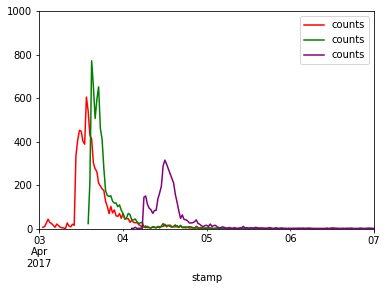

In [46]:
ax = Cv_url_counts.plot(kind="line", color = "red", xlim=("2017-04-03 00:00:00", "2017-04-07 00:00:00"), ylim=(0,1000))
#tweet_counts.plot(ax=ax, kind="line", xlim=("2017-04-03 00:00:00", "2017-04-08 00:00:00"), ylim=(0,1000))
Bb_url_counts.plot(ax=ax, kind="line", xlim=("2017-04-03 00:00:00", "2017-04-07 00:00:00"), ylim=(0,1000), color="green")
DC_url_counts.plot(ax=ax, kind="line", xlim=("2017-04-03 00:00:00", "2017-04-07 00:00:00"), ylim=(0,1000), color="purple")


**Notes**

Cernovich's Medium post (red), where the story originated, was the first to gain traction and peak. 

Then, Bloomberg (green) came on the scene and actually eclipsed Cernovich's original post.

Daily Caller (purple) came on the scene a day later and reached about half the volume of Cernovich's original post. 

In [47]:
#Now, we will attempt some text analysis!

In [48]:
from requests import get
from bs4 import BeautifulSoup
from pandas import DataFrame

Cernovich_Medium_url = "https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16"
head_data = {'From': 'as5165@columbia.edu'}

response = get(Cernovich_Medium_url,headers=head_data)    
page = BeautifulSoup(response.text)

/Users/christinehansen/.virtualenvs/marksclass/lib/python2.7/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 162 of the file /System/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [49]:
print page.prettify()

<!DOCTYPE html>
<html xmlns:cc="http://creativecommons.org/ns#">
 <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# medium-com: http://ogp.me/ns/fb/medium-com#">
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Susan Rice Requested Unmasking of Incoming Trump Administration Officials
  </title>
  <link href="https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16" rel="canonical"/>
  <meta content="Susan Rice Requested Unmasking of Incoming Trump Administration Officials" name="title"/>
  <meta content="unsafe-url" name="referrer"/>
  <meta content="Susan Rice, who served as the National Security Adviser under President Obama, has been identified as the official who requested unmasking of incoming Trump officials, Cernovich Media can exclusively…" name="description"/>
  <meta content="#000000" name="theme-colo

In [50]:
print page.find_all('p')

[<p class="graf graf--p graf-after--h3" id="db40" name="db40">Susan Rice, who served as the National Security Adviser under President Obama, has been identified as the official who requested unmasking of incoming Trump officials, Cernovich Media can exclusively report.</p>, <p class="graf graf--p graf-after--p" id="a3ea" name="a3ea">The White House Counsel\u2019s office identified Rice as the person responsible for the unmasking after examining Rice\u2019s document log requests. The reports Rice requested to see are kept under tightly-controlled conditions. Each person must log her name before being granted access to them.</p>, <p class="graf graf--p graf-after--p" id="c2b7" name="c2b7">Upon learning of Rice\u2019s actions, H. R. McMaster dispatched his close aide Derek Harvey to Capitol Hill to brief Chairman Nunes.</p>, <p class="graf graf--p graf--startsWithDoubleQuote graf-after--p" id="2765" name="2765">\u201cUnmasking\u201d is the process of identifying individuals whose communic

In [51]:
Cernovich_Medium_Text = str(page.find_all('p'))

In [52]:
#print (page.get_text())

In [53]:
#print(page.get_text())

In [54]:
from nltk import download
download('brown')
download('punkt')
download('maxent_ne_chunker')
download('words')
download('conll2000')
download('maxent_treebank_pos_tagger')
download('averaged_perceptron_tagger')

[nltk_data] Downloading package brown to
[nltk_data]     /Users/christinehansen/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/christinehansen/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/christinehansen/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/christinehansen/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/christinehansen/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/christinehansen/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_pe

True

In [55]:
from textblob import TextBlob

Cernovich_Medium_Text_tb = TextBlob(Cernovich_Medium_Text)

In [56]:
Cernovich_Medium_Text_tb.words

WordList(['p', 'class', 'graf', 'graf', 'p', 'graf-after', 'h3', 'id', 'db40', 'name', 'db40', 'Susan', 'Rice', 'who', 'served', 'as', 'the', 'National', 'Security', 'Adviser', 'under', 'President', 'Obama', 'has', 'been', 'identified', 'as', 'the', 'official', 'who', 'requested', 'unmasking', 'of', 'incoming', 'Trump', 'officials', 'Cernovich', 'Media', 'can', 'exclusively', 'report', 'p', 'p', 'class', 'graf', 'graf', 'p', 'graf-after', 'p', 'id', 'a3ea', 'name', 'a3ea', 'The', 'White', 'House', 'Counsel\\u2019s', 'office', 'identified', 'Rice', 'as', 'the', 'person', 'responsible', 'for', 'the', 'unmasking', 'after', 'examining', 'Rice\\u2019s', 'document', 'log', 'requests', 'The', 'reports', 'Rice', 'requested', 'to', 'see', 'are', 'kept', 'under', 'tightly-controlled', 'conditions', 'Each', 'person', 'must', 'log', 'her', 'name', 'before', 'being', 'granted', 'access', 'to', 'them', 'p', 'p', 'class', 'graf', 'graf', 'p', 'graf-after', 'p', 'id', 'c2b7', 'name', 'c2b7', 'Upon', '

In [57]:
Cernovich_NounPhrases = Cernovich_Medium_Text_tb.noun_phrases

In [58]:
Bloomberg_url = "https://www.bloomberg.com/view/articles/2017-04-03/top-obama-adviser-sought-names-of-trump-associates-in-intel"
head_data = {'From': 'as5165@columbia.edu'}

response = get(Bloomberg_url,headers=head_data)    
Bloomberg_page = BeautifulSoup(response.text)

In [59]:
print page.prettify()

<!DOCTYPE html>
<html xmlns:cc="http://creativecommons.org/ns#">
 <head prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# medium-com: http://ogp.me/ns/fb/medium-com#">
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Susan Rice Requested Unmasking of Incoming Trump Administration Officials
  </title>
  <link href="https://medium.com/@Cernovich/susan-rice-requested-unmasking-of-incoming-trump-administration-officials-30085b5cff16" rel="canonical"/>
  <meta content="Susan Rice Requested Unmasking of Incoming Trump Administration Officials" name="title"/>
  <meta content="unsafe-url" name="referrer"/>
  <meta content="Susan Rice, who served as the National Security Adviser under President Obama, has been identified as the official who requested unmasking of incoming Trump officials, Cernovich Media can exclusively…" name="description"/>
  <meta content="#000000" name="theme-colo

In [60]:
Bloomberg_text = str(Bloomberg_page.find_all('p'))

In [61]:
Bloomberg_text

'[<p class="bb-that-category__text">Connecting decision makers to a dynamic network of information, people and ideas, Bloomberg quickly and accurately delivers business and financial information, news and insight around the world.</p>, <p class="bb-that-category__text">Americas<br/>\\r\\n+1 212 318 2000</p>, <p class="bb-that-category__text">Europe, Middle East, &amp; Africa<br/>\\r\\n+44 20 7330 7500</p>, <p class="bb-that-category__text">Asia Pacific<br/>\\r\\n+65 6212 1000</p>, <p class="bb-that-category__text">Connecting decision makers to a dynamic network of information, people and ideas, Bloomberg quickly and accurately delivers business and financial information, news and insight around the world.</p>, <p class="bb-that-category__text">Americas<br/>\\r\\n+1 212 318 2000</p>, <p class="bb-that-category__text">Europe, Middle East, &amp; Africa<br/>\\r\\n+44 20 7330 7500</p>, <p class="bb-that-category__text">Asia Pacific<br/>\\r\\n+65 6212 1000</p>, <p><span>Investigators saw a p

In [62]:
Bloomberg_Text_tb = TextBlob(Bloomberg_text)

In [63]:
Bloomberg_NounPhrases = Bloomberg_Text_tb.noun_phrases

In [64]:
same_values = set(Bloomberg_NounPhrases) & set(Cernovich_NounPhrases)

In [65]:
same_values

{u'< /a >',
 u'< /p >',
 u'< p class=',
 u'[ < p class=',
 u'nofollow noopener',
 'nunes',
 'obama',
 'rice',
 u'susan rice',
 'trump',
 u'white house'}

In [66]:
#other articles from April 3: 

#USANews = https://www.usnews.com/news/national-news/articles/2017-04-03/obama-adviser-susan-rice-sought-names-of-trump-officials-in-intel-reports
#Circa.com = http://circa.com/politics/accountability/white-house-logs-indicate-susan-rice-consumed-unmasked-intel-on-trump-associates
#WashingtonTimes = http://www.washingtontimes.com/news/2017/apr/3/susan-rice-ordered-unmasking-trump-team-intel-bloo/
#WSJ = https://www.wsj.com/articles/susan-rice-unmasked-1491262064
#Daily Caller = http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/

In [67]:
USANews_url = "https://www.usnews.com/news/national-news/articles/2017-04-03/obama-adviser-susan-rice-sought-names-of-trump-officials-in-intel-reports"
head_data = {'From': 'as5165@columbia.edu'}

response = get(USANews_url,headers=head_data)    
USANews_page = BeautifulSoup(response.text)

In [68]:
USANews_text = str(USANews_page.find_all('p'))

In [69]:
USANews_Text_tb = TextBlob(USANews_text)

In [70]:
USANews_NounPhrases = USANews_Text_tb.noun_phrases

In [109]:
DailyCaller_url = "http://dailycaller.com/2017/04/03/susan-rice-ordered-spy-agencies-to-produce-detailed-spreadsheets-involving-trump/"
head_data = {'From': 'ceh2191@columbia.edu'}

response = get(DailyCaller_url,headers=head_data)    
DailyCaller_page = BeautifulSoup(response.text)

In [111]:
DailyCaller_text = str(DailyCaller_page.find_all('p'))

In [112]:
DailyCaller_Text_tb = TextBlob(DailyCaller_text)

In [113]:
USANews_NounPhrases = USANews_Text_tb.noun_phrases

In [71]:
Circa_url = "https://www.usnews.com/news/national-news/articles/2017-04-03/obama-adviser-susan-rice-sought-names-of-trump-officials-in-intel-reports"
head_data = {'From': 'as5165@columbia.edu'}

response = get(Circa_url,headers=head_data)    
Circa_page = BeautifulSoup(response.text)

In [72]:
Circa_text = str(Circa_page.find_all('p'))

In [73]:
Circa_Text_tb = TextBlob(Circa_text)

In [74]:
Circa_NounPhrases = Circa_Text_tb.noun_phrases

In [75]:
Circa_NounPhrases

WordList([u'[ < p > \\nreference # 18.c7a83d42.1494009364.38c2985\\n < /p > ]'])

In [76]:
WashingtonTimes_url = "http://www.washingtontimes.com/news/2017/apr/3/susan-rice-ordered-unmasking-trump-team-intel-bloo/"
head_data = {'From': 'as5165@columbia.edu'}

response = get(WashingtonTimes_url,headers=head_data)    
WashingtonTimes_page = BeautifulSoup(response.text)

In [77]:
WashingtonTimes_text = str(WashingtonTimes_page.find_all('p'))

In [78]:
WashingtonTimes_Text_tb = TextBlob(WashingtonTimes_text)

In [79]:
WashingtonTimes_NounPhrases = WashingtonTimes_Text_tb.noun_phrases

In [80]:
WSJ_url = "https://www.wsj.com/articles/susan-rice-unmasked-1491262064"
head_data = {'From': 'as5165@columbia.edu'}

response = get(WSJ_url,headers=head_data)    
WSJ_page = BeautifulSoup(response.text)

In [81]:
WSJ_text = str(WSJ_page.find_all('p'))

In [82]:
WSJ_Text_tb = TextBlob(WSJ_text)

In [83]:
WSJ_NounPhrases = WSJ_Text_tb.noun_phrases

In [84]:
WSJ_NounPhrases

WordList([u'[ < p >', 'well', 'trump', u'transition officials', 'u.s.', u'intelligence reports', u'susan rice', u'barack obama\\u2019s', u'national security adviser', u'< /p >', u'< p >', 'u.s.', u'official confirms', u'bombshell news', 'bloomberg', u'ms. rice', 'trump', u'intelligence report', u'... \\n < /p >', u'< p > \\n < span class=', u'> <', 'subscribe', u'< /a > < /span > < span class=', u'> <', u'target=http % 3a % 2f % 2fwww.wsj.com % 2farticles % 2fsusan-rice-unmasked-1491262064', 'sign', u'< /a > < /span > \\n < /p >', u'< p class=', u'wsj membership', u'< /p >', u'< p class=', 'customer', u'service < /p >', u'< p class=', 'tools', 'features', u'< /p >', u'< p class=', 'ads', u'< /p >', u'< p class=', u'< /p > ]'])

In [85]:
#so for April 3 we have: 
#Bloomberg = Bloomberg_NounPhrases
#Cernovich/Medium = Cernovich_NounPhrases
#USA News = USANews_NounPhrases
#Circa = Circa_NounPhrases
#Washington Times = WashingtonTimes_NounPhrases
#WSJ = WSJ_NounPhrases

In [86]:
from collections import Counter
counts = Counter(Bloomberg_NounPhrases)
print(counts)

Counter({'trump': 17, u'< p >': 12, 'rice': 11, 'u.s.': 9, u'< /p >': 8, u'< p class=': 8, u'white house': 5, 'nunes': 4, u"'s requests": 4, u'transition officials': 4, u'intelligence reports': 3, 'bloomberg': 3, u'ref_url=http % 3a % 2f % 2fmiami.cbslocal.com %': 2, u'< br/ > \\r\\n+1': 2, u'multiple requests': 2, u'delivers business': 2, u'financial information': 2, 'asia': 2, 'connecting': 2, 'europe': 2, 'americas': 2, u'% 2ftrump-obama-had-my-wires-tapped-in-trump-tower % 2f': 2, 'africa': 2, u'foreign officials': 2, u'ref_src=twsrc % 5etfw': 2, u'dynamic network': 2, u'world. < /p >': 2, u'pacific < br/ > \\r\\n+65': 2, u'< br/ > \\r\\n+44': 2, u'nofollow noopener': 2, u'decision makers': 2, 'obama': 2, u'< /a >': 1, u'administration.\\xa0 < /p >': 1, u"president 's inauguration. < /p >": 1, u'direct contact': 1, u'adam schiff': 1, u'russian influence operation': 1, 'march': 1, u'editorial board': 1, u'view computer systems': 1, 'counsel': 1, u'law. < /p >': 1, u'incidental surve

In [87]:
#https://www.digitalocean.com/community/tutorials/how-to-graph-word-frequency-using-matplotlib-with-python-3

In [88]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [89]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [90]:
text1.count("he")

1661

In [91]:
fdist1 = FreqDist(Bloomberg_NounPhrases) 
print(fdist1) 

<FreqDist with 99 samples and 195 outcomes>


In [92]:
fdist1.most_common(50) 

[('trump', 17),
 (u'< p >', 12),
 ('rice', 11),
 ('u.s.', 9),
 (u'< /p >', 8),
 (u'< p class=', 8),
 (u'white house', 5),
 ('nunes', 4),
 (u"'s requests", 4),
 (u'transition officials', 4),
 (u'intelligence reports', 3),
 ('bloomberg', 3),
 (u'ref_url=http % 3a % 2f % 2fmiami.cbslocal.com %', 2),
 (u'< br/ > \\r\\n+1', 2),
 (u'multiple requests', 2),
 (u'delivers business', 2),
 (u'financial information', 2),
 ('asia', 2),
 ('connecting', 2),
 ('europe', 2),
 ('americas', 2),
 (u'% 2ftrump-obama-had-my-wires-tapped-in-trump-tower % 2f', 2),
 ('africa', 2),
 (u'foreign officials', 2),
 (u'ref_src=twsrc % 5etfw', 2),
 (u'dynamic network', 2),
 (u'world. < /p >', 2),
 (u'pacific < br/ > \\r\\n+65', 2),
 (u'< br/ > \\r\\n+44', 2),
 (u'nofollow noopener', 2),
 (u'decision makers', 2),
 ('obama', 2),
 (u'< /a >', 1),
 (u'administration.\\xa0 < /p >', 1),
 (u"president 's inauguration. < /p >", 1),
 (u'direct contact', 1),
 (u'adam schiff', 1),
 (u'russian influence operation', 1),
 ('march',

In [93]:
Bloomberg_Rice = Bloomberg_text.count("Rice")
WSJ_Rice = WSJ_text.count("Rice")
Cernovich_Rice = Cernovich_Medium_Text.count("Rice")
Circa_Rice = Circa_text.count("Rice")
USANews_Rice = USANews_text.count("Rice")
WashingtonTimes_Rice = WashingtonTimes_text.count("Rice")

In [94]:
Bloomberg_Rice

13

In [95]:
WSJ_Rice

2

In [96]:
Cernovich_Rice

7

In [97]:
Circa_Rice

0

In [98]:
USANews_Rice

0

In [99]:
WashingtonTimes_Rice

9

In [101]:
from plotly.plotly import iplot, sign_in
import plotly.graph_objs as go

sign_in("as5165","1hGDdK1pPutHYCgidQoM")

data = [Bloomberg_Rice, WSJ_Rice, Cernovich_Rice, Circa_Rice, USANews_Rice, WashingtonTimes_Rice];

#trendy_tops = trendy[trendy["topic_name"].isin(tops)]

mydata = [go.Scatter(x=data,y=data,mode="markers")]
mylayout = go.Layout(autosize=False, width=400,height=400,margin=go.Margin(l=150,r=50,b=100,t=100,pad=4))
myfigure = go.Figure(data = mydata, layout = mylayout)
iplot(myfigure)

**Next up: **
Cernovich said the story was "stolen" from him. 
How many outlets mentioned Cernovich in their coverage?

In [114]:
Bloomberg_Cv = Bloomberg_text.count("Cernovich")
WSJ_Cv = WSJ_text.count("Cernovich")
Circa_Cv = Circa_text.count("Cernovich")
USANews_Cv = USANews_text.count("Cernovich")
WashingtonTimes_Cv = WashingtonTimes_text.count("Cernovich")
DailyCaller_Cv = DailyCaller_text.count("Cernovich")

In [104]:
Bloomberg_Cv

0

In [105]:
WSJ_Cv

0

In [106]:
Circa_Cv

0

In [107]:
USANews_Cv

0

In [108]:
WashingtonTimes_Cv

0

In [115]:
DailyCaller_Cv

0